# CAPSTONE PROJECT
## BLOSSOM BANK FRAUD DETECTION
    
### The Project Aim
     - The aim of this project is to build 'Blossom Bank' a Machine Learning model that predict transactions that might be fraudlent.

    
### Project Description
     - Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.
 
 
### Column Description 
    - step :- is the number steps taken to perform said transaction
    - type :- is the transaction type
    - amount :- is the amount moved in the transaction
    - nameOrig :- is the name of account the transaction originates from
    - oldbalanceOrg :- amount in the account before transaction
    - newbalanceOrig :- is amount left in account after transaction
    - nameDest :- is the name of account the transaction beneficiary
    - oldbalanceDest :- is the amount in the account before transaction
    - newbalanceDest :- is the new amount in the account after transaction
    - isFraud :- This column shows if the transaction was fraud
    
### Data Size
    - 1048575, 10
    
### Target Column
    - isFruad :- so as tells us which future transaction will be fraudlent

In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot") # for improved graphics
plt.rcParams["figure.figsize"] = (15,10) # to have a uniformed plot size
plt.rcParams.update({"font.size": 16}) # for uniform & legible text size

import seaborn as sns

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [2]:
# load the data

data = pd.read_csv("Online Payment Fraud Detection.csv")

data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [3]:
# Create backup of data
df = data.copy(deep = True)

df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [4]:
# check dataframer shape
df.shape

(1048575, 10)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
df["type"].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [8]:
df["step"].value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

In [9]:
df["isFraud"].value_counts()


0    1047433
1       1142
Name: isFraud, dtype: int64

In [10]:
# to check 4 any missing values
is_null = df.isnull().any(axis=1).sum()
print (f" The total numbers of missing value in dataframe is {is_null}.") 

 The total numbers of missing value in dataframe is 0.


# Exploratory Data Analysis

Text(0.5, 1.0, 'Transaction Steps')

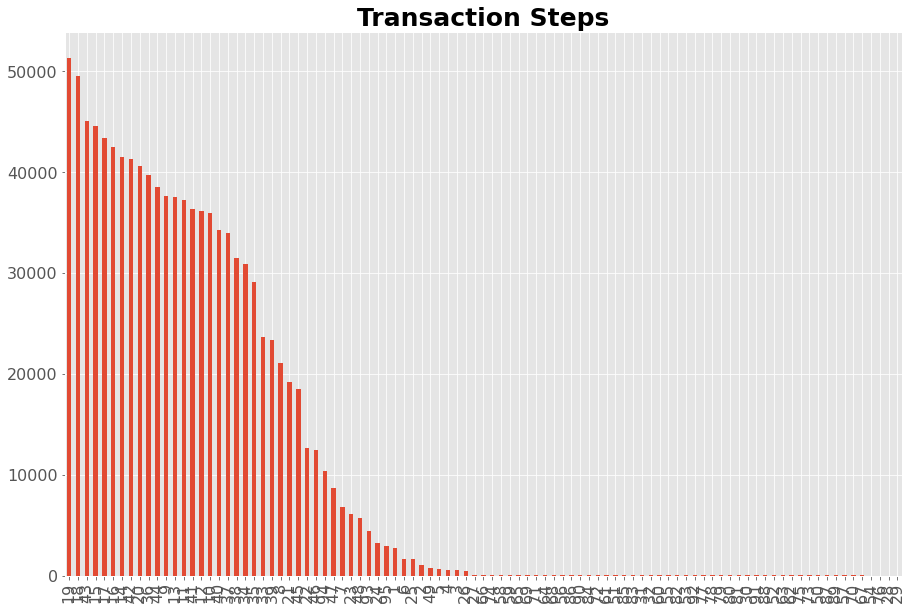

In [11]:
# check the frequency of transaction steps

df["step"].value_counts().plot(kind ="bar")
plt.title("Transaction Steps", fontsize= 25, fontweight= "bold", color= ("Black"))

Text(0.5, 1.0, 'Transaction Type')

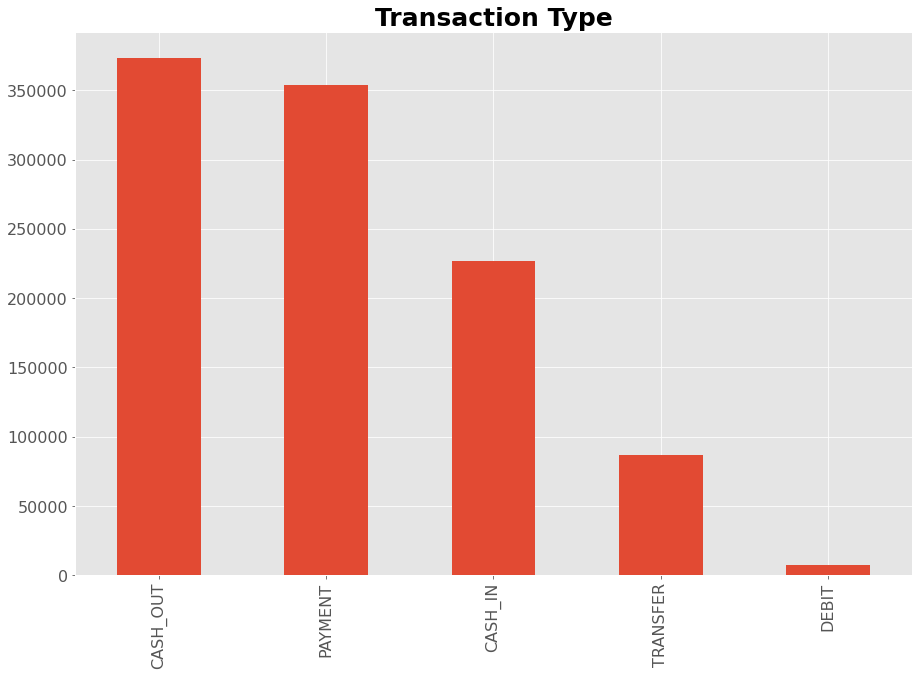

In [12]:
# check the frequency of each transaction type

df["type"].value_counts().plot(kind ="bar")
plt.title("Transaction Type", fontsize= 25, fontweight= "bold", color= ("Black"))

Text(0.5, 1.0, 'True & False Count')

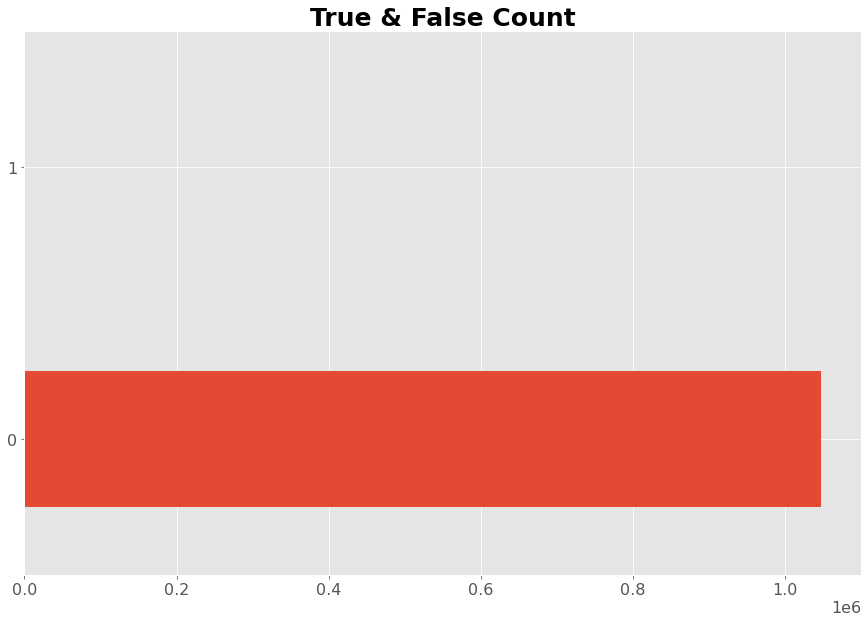

In [13]:
# Show the Ratio of Fraud transaction in thr bank.

df["isFraud"].value_counts().plot.barh()
plt.title("True & False Count", fontsize= 25, fontweight= "bold", color= ("Black")) #specification for Plot Title

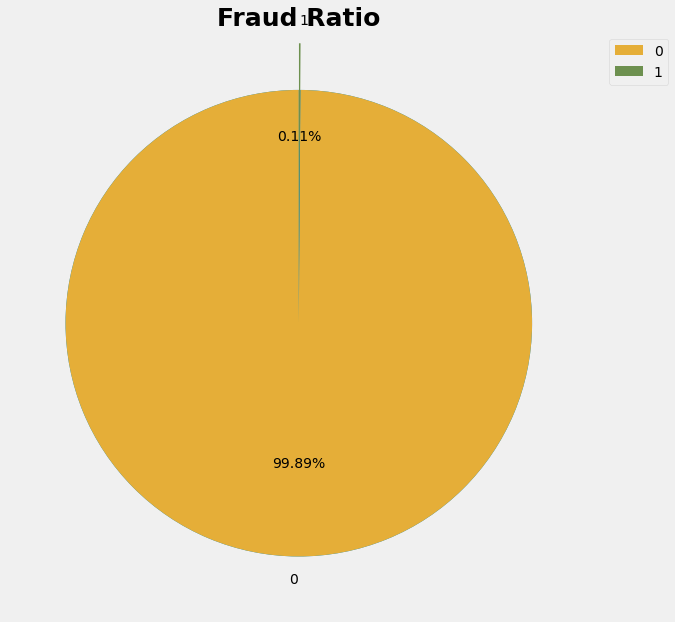

In [14]:
# Show the Ratio of Fraud transaction in thr bank.
plt.style.use("fivethirtyeight")
fraud = df["isFraud"].value_counts(normalize=False)
explode = [0, 0.2]
plt.pie(fraud)

plt.pie(x=(fraud), labels=(["0", "1"]), wedgeprops = {"linewidth": 53}, explode = explode, autopct="%.2f%%", startangle = 90) # (autopct="%.2f%%") adds the percentage to a label

plt.title("Fraud Ratio", fontsize= 25, fontweight= "bold", color= ("Black")) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left') #specify legend position
plt.show()

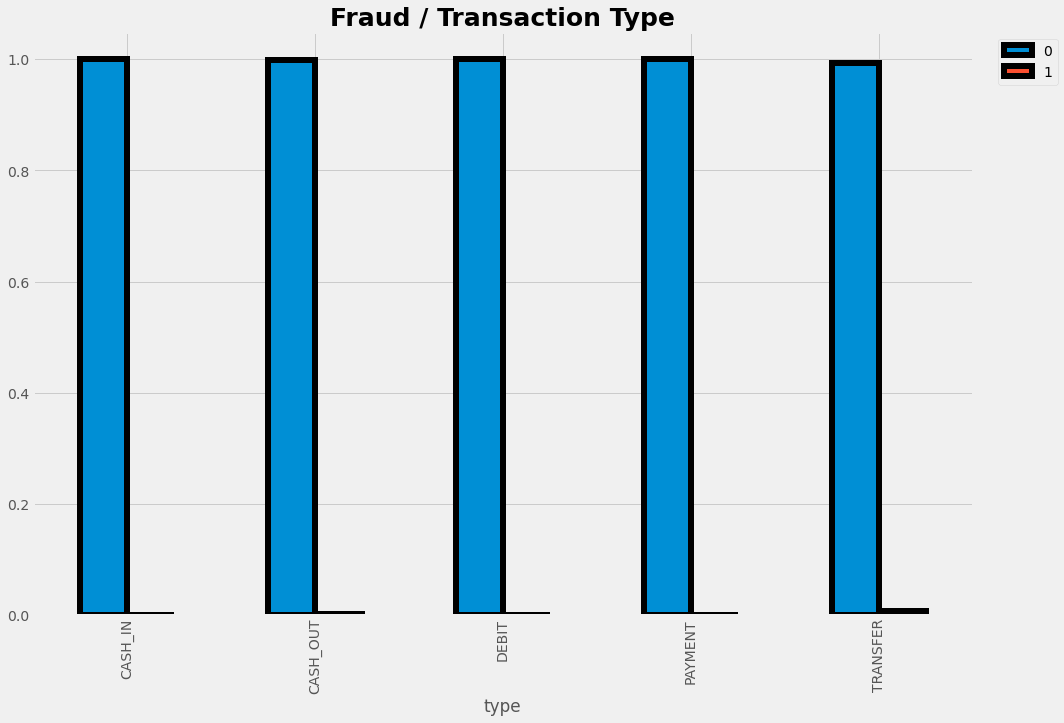

In [15]:
#bivariate analysis cells
#create pivot of Transaction types and Fraud

transac_fraud = pd.crosstab(df.type,df.isFraud,normalize="index")

# plot the data

transac_fraud.plot.bar(stacked=False, edgecolor ='black', linewidth = 6 )

plt.title("Fraud / Transaction Type", fontsize= 25, fontweight= "bold", color= ("Black")) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [16]:
df[df["step"] == 45]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
984174,45,CASH_OUT,5599.96,C1773037857,8059.00,2459.04,C1920779829,0.00,5599.96,0
984175,45,CASH_OUT,262333.57,C1214634681,28505.00,0.00,C2059730920,1410850.01,1673183.58,0
984176,45,PAYMENT,1807.65,C274134714,0.00,0.00,M812340343,0.00,0.00,0
984177,45,CASH_OUT,195625.86,C706135098,26097.00,0.00,C1959094881,3252482.19,3448108.06,0
984178,45,PAYMENT,14432.67,C1279288275,5537.00,0.00,M1803861959,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1002669,45,CASH_IN,165135.83,C466503014,309141.48,474277.31,C1748453844,183927.98,18792.16,0
1002670,45,CASH_IN,245308.01,C973229999,474277.31,719585.32,C641868314,893249.52,647941.52,0
1002671,45,CASH_IN,535925.22,C919518115,719585.32,1255510.54,C1303000745,925730.21,389804.99,0
1002672,45,CASH_IN,471172.69,C2039683898,1255510.54,1726683.23,C384335381,585949.91,114777.22,0


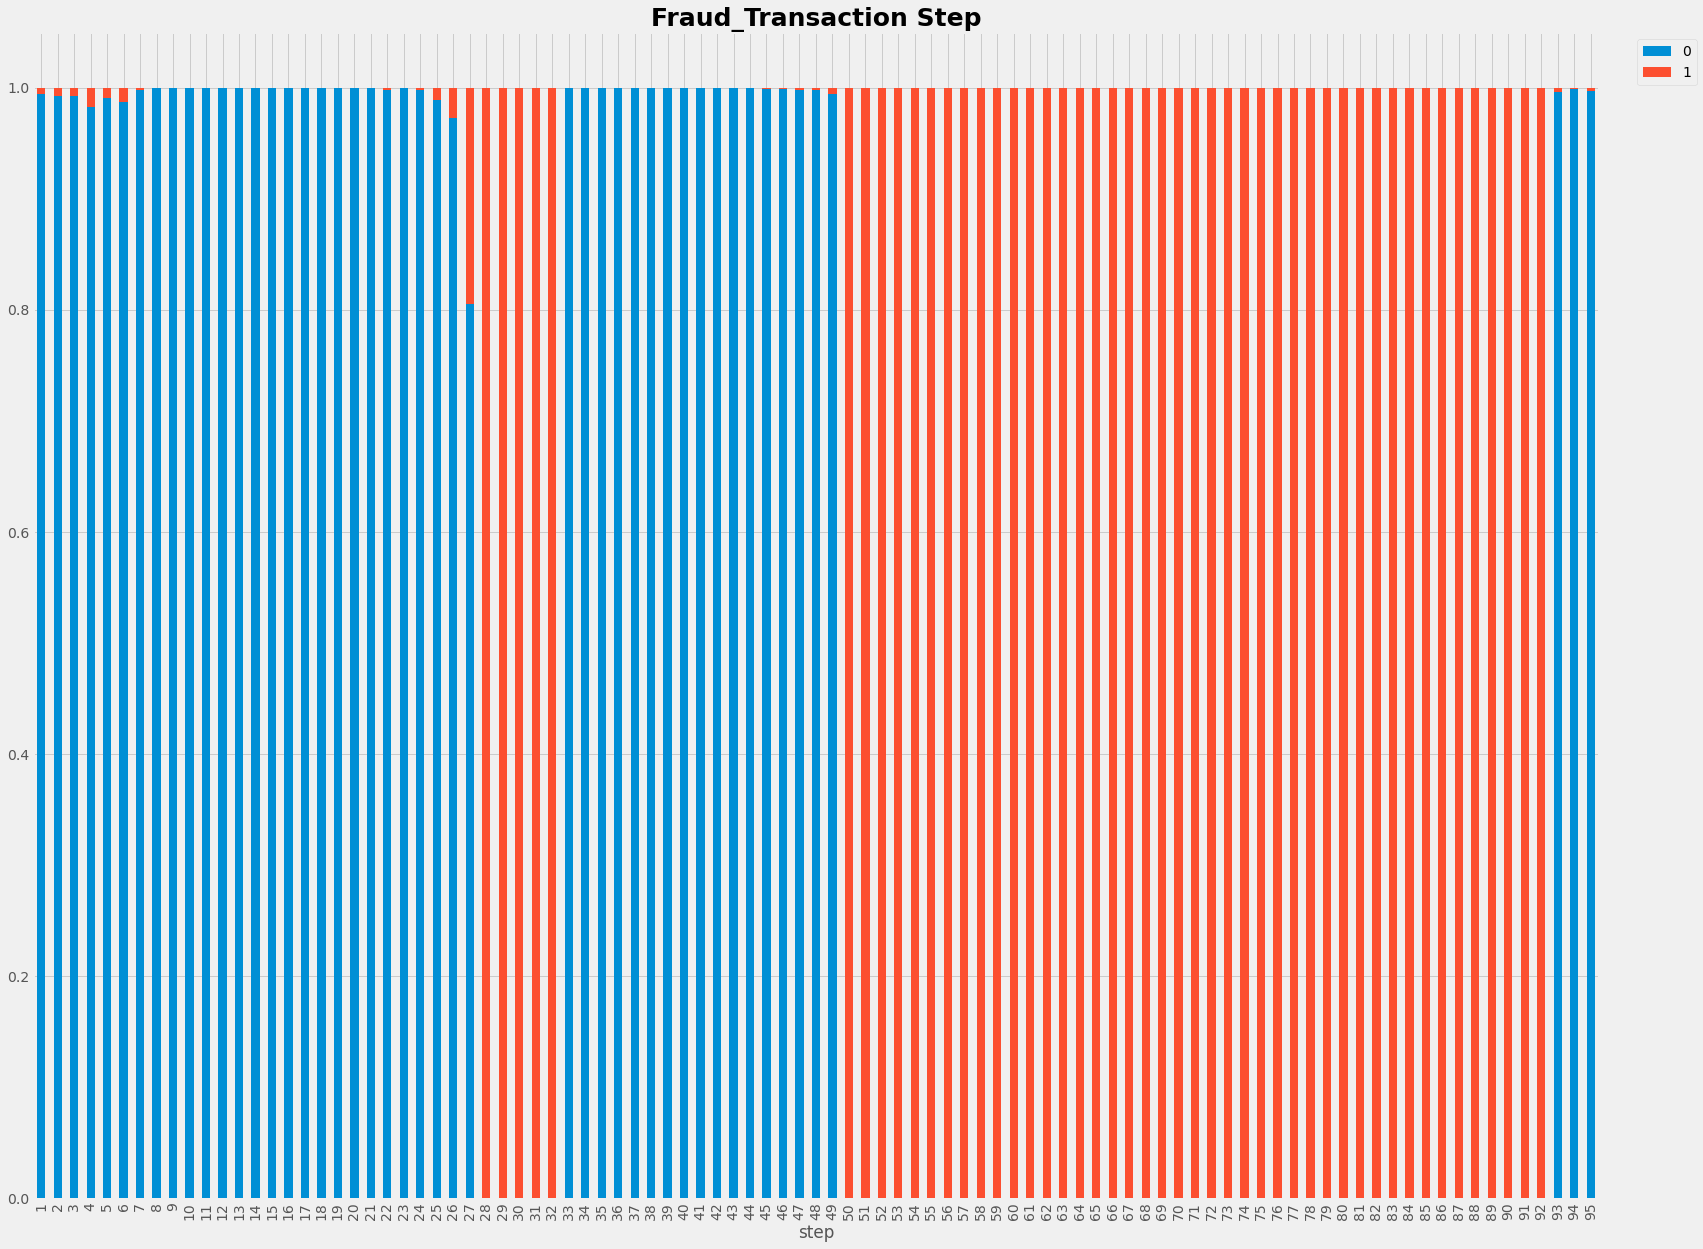

In [17]:
#bivariate analysis cells
#create pivot of Transaction steps and Fraud
# to show if transaction step count has any deep corelation to fraudlence

step_fraud = pd.crosstab(df.step,df.isFraud,normalize="index")

# plot the data

step_fraud.plot.bar(stacked=True, figsize = (25,20)) # 

plt.title("Fraud_Transaction Step", fontsize= 25, fontweight= "bold", color= ("Black")) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

## Feature Engineering

In this stage we prepare the data for modelling. It's all about selecting, manipulating and transforming data into features that your machine learning algorithms can work better with.

First, replace some values to something the machine can more easily understand

**TODO: Encode values in the data set**

* replace CASH_OUT with 0
* replace PAYMENT with 1
* replace CASH_IN with 2
* replace TRANSFER with 3
* replace DEBIT with 4
* create bins of the transaction step "step" column

Do this on the entire dataframe using syntax similar to `dataframe.replace('old value','new value')`

In [18]:
#YOUR CODE HERE

df["type"] = df["type"].replace(["CASH_OUT"],[0])
df["type"] = df["type"].replace(["PAYMENT"],[1])
df["type"] = df["type"].replace(["CASH_IN"],[2])
df["type"] = df["type"].replace(["TRANSFER"],[3])
df["type"] = df["type"].replace(["DEBIT"],[4])

<AxesSubplot:ylabel='Frequency'>

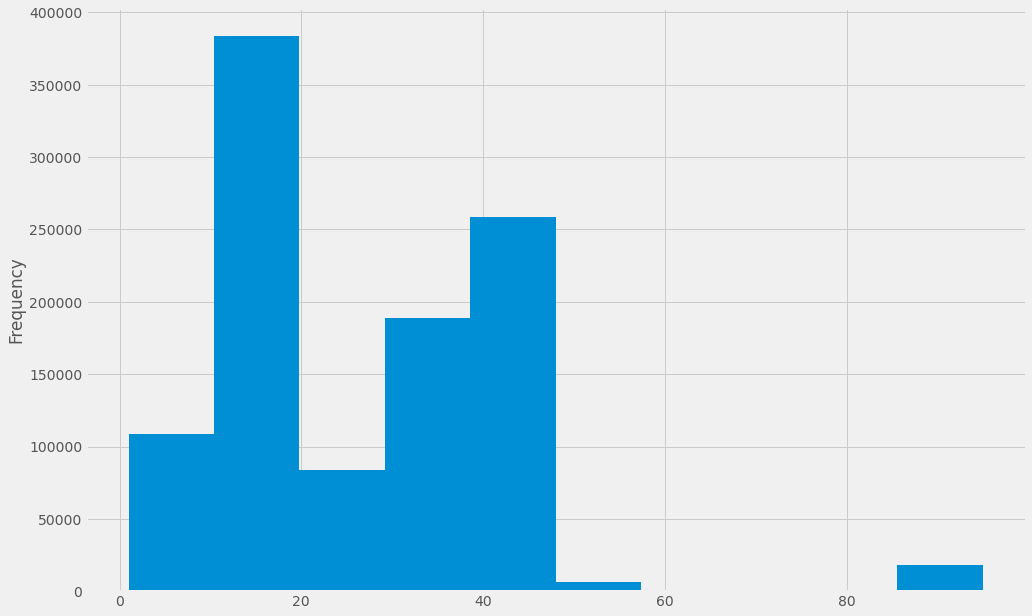

In [19]:
df["step"].plot(kind='hist')

In [20]:
df.describe().astype(int)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,1,158666,874009,893808,978160,1114197,0
std,15,0,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0,0
25%,15,0,12149,0,0,0,0,0
50%,20,1,76343,16002,0,126377,218260,0
75%,39,2,213761,136642,174599,915923,1149807,0
max,95,4,10000000,38900000,38900000,42100000,42200000,1


In [21]:
df["step"] = pd.qcut(
    df["step"], 
    [0, 0.20, 0.4, 0.6, 0.8, 1], 
    labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
)

df.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0-20%,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,0-20%,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,0-20%,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,0-20%,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,0-20%,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
5,0-20%,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0


In [22]:
df["step"].value_counts()

61-80%     228393
21-40%     221505
0-20%      219626
41-60%     189763
81-100%    189288
Name: step, dtype: int64

In [23]:
df["step"] = df["step"].replace(["0-20%"],[1])
df["step"] = df["step"].replace(["21-40%"],[2])
df["step"] = df["step"].replace(["41-60%"],[3])
df["step"] = df["step"].replace(["61-80%"],[4])
df["step"] = df["step"].replace(["81-100%"],[5])

In [24]:
df["step"].value_counts()

4    228393
2    221505
1    219626
3    189763
5    189288
Name: step, dtype: int64

<AxesSubplot:>

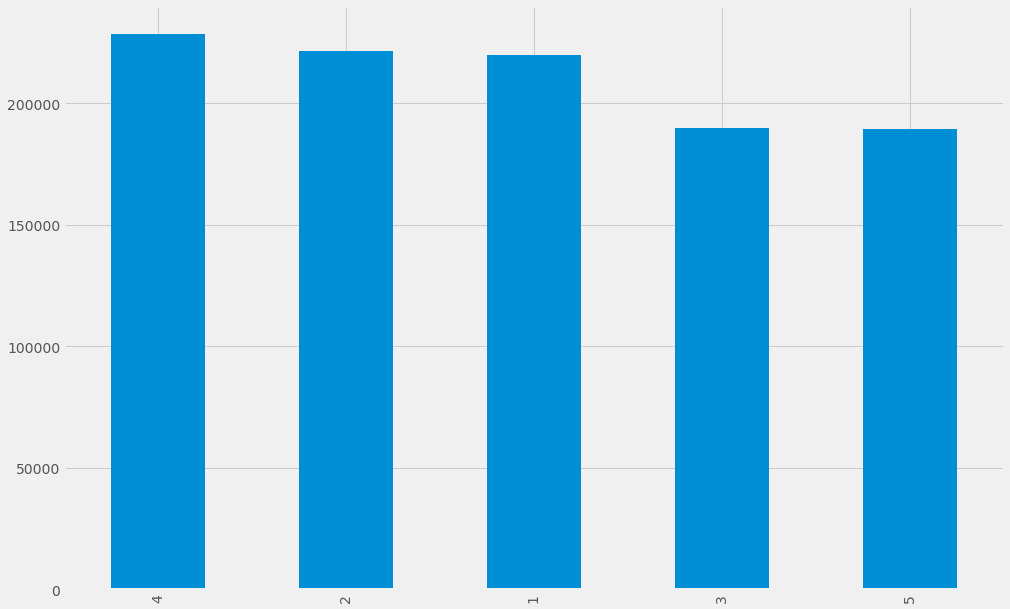

In [25]:
df["step"].value_counts().plot(kind ="bar")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   step            1048575 non-null  category
 1   type            1048575 non-null  int64   
 2   amount          1048575 non-null  float64 
 3   nameOrig        1048575 non-null  object  
 4   oldbalanceOrg   1048575 non-null  float64 
 5   newbalanceOrig  1048575 non-null  float64 
 6   nameDest        1048575 non-null  object  
 7   oldbalanceDest  1048575 non-null  float64 
 8   newbalanceDest  1048575 non-null  float64 
 9   isFraud         1048575 non-null  int64   
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 73.0+ MB


# Sample 

In [27]:
df.groupby("isFraud").mean().astype(int)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,1,157539,873633,894746,978732,1114237
1,1,1192628,1218636,33944,452866,1077940


To defiine sample characteristics

from our EDA it has been observed that 98.89% of our dataset are non fraudlent transactions here we get the exact figure of the fraudlent transactions so as to extract a sample of equal quantity so our model will not be skewed

In [28]:
# Confirm size of fraudlent and non fraudlent transactions

notfraud=df[df["isFraud"]==0]
fraud= df[df["isFraud"]==1]
print(f"""{notfraud.shape[0]} is the total number of legit transactions in the dataframe, 
While, {fraud.shape[0]} is the total number of fraudlent transactions in the dataframe""")

1047433 is the total number of legit transactions in the dataframe, 
While, 1142 is the total number of fraudlent transactions in the dataframe


In [29]:
# number of fraud transaction is 1142
# we need 1142 the legit so that the transaction will be evenly distributed

notFraud = notfraud.sample(n=1142)


In [30]:
#combine bothe the population sample and the fraudlent transactions

sample_set = pd.concat([notFraud,fraud],axis = 0)

In [31]:
print (sample_set.shape)
sample_set.head(6)

(2284, 10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
306368,2,1,31735.52,C1277571890,59331.89,27596.37,M827570981,0.00,0.00,0
69479,1,0,246166.73,C1383059243,1272.00,0.00,C1431097086,26162.78,385010.41,0
241299,2,0,250432.21,C700952775,31084.37,0.00,C1493103616,285574.57,413681.27,0
856043,4,0,37544.12,C1221174052,0.00,0.00,C600440772,3247294.31,3284838.43,0
235045,2,1,14224.44,C406239619,0.00,0.00,M335501389,0.00,0.00,0
196290,1,0,80371.58,C747185197,211249.28,130877.70,C457880796,4656790.74,4737162.32,0


## One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of it's own. The values in this new column will be either 1 or 0 to show whether that value exists or not.

**Steps**
* First, create a list named "toEncode" that contains values for `["nameOrig", "nameDest"]`.

* Second, use `pd.get_dummies()` to one-hot encode a dataframe of the categorical values. Filter using `df[toEncode]`. Save the encoded variables in a separate dataframe `dummies`.

* Third, use `pd.concat` to join the newly encoded variables into the original dataframe `df`.

* Finally, remove the originally unencoded categorical columns because we don't need them anymore.

In [32]:
#1. select categorical variables
#replace pass with your code

toEncode = ["nameOrig", "nameDest"]
hot_code = sample_set[toEncode]


In [33]:
hot_code.shape

(2284, 2)

In [34]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

dummies = pd.get_dummies(hot_code)

#view what you have done
print(dummies.shape)
dummies.head()

(2284, 4547)


,nameOrig_C1000086512,nameOrig_C1000711819,nameOrig_C1000937208,nameOrig_C1002446735,nameOrig_C1003023037,nameOrig_C1004099532,nameOrig_C1004271827,nameOrig_C1006070662,nameOrig_C1007075789,nameOrig_C1008689858,...,nameDest_M974902176,nameDest_M975069510,nameDest_M978201912,nameDest_M984733885,nameDest_M988188990,nameDest_M990762903,nameDest_M991727787,nameDest_M992832570,nameDest_M995987513,nameDest_M999210021
306368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both df and dummies as a list of their names

df2 = pd.concat([sample_set, dummies], axis=1)

#check what you have done
print(df2.shape)
df2.head()

(2284, 4557)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,nameDest_M974902176,nameDest_M975069510,nameDest_M978201912,nameDest_M984733885,nameDest_M988188990,nameDest_M990762903,nameDest_M991727787,nameDest_M992832570,nameDest_M995987513,nameDest_M999210021
306368,2,1,31735.52,C1277571890,59331.89,27596.37,M827570981,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
69479,1,0,246166.73,C1383059243,1272.00,0.00,C1431097086,26162.78,385010.41,0,...,0,0,0,0,0,0,0,0,0,0
241299,2,0,250432.21,C700952775,31084.37,0.00,C1493103616,285574.57,413681.27,0,...,0,0,0,0,0,0,0,0,0,0
856043,4,0,37544.12,C1221174052,0.00,0.00,C600440772,3247294.31,3284838.43,0,...,0,0,0,0,0,0,0,0,0,0
235045,2,1,14224.44,C406239619,0.00,0.00,M335501389,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# drop unencoded column

hot_dummy = df2.drop(toEncode, axis = 1)
print(hot_dummy.shape)
hot_dummy.head(6)

(2284, 4555)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameOrig_C1000086512,nameOrig_C1000711819,...,nameDest_M974902176,nameDest_M975069510,nameDest_M978201912,nameDest_M984733885,nameDest_M988188990,nameDest_M990762903,nameDest_M991727787,nameDest_M992832570,nameDest_M995987513,nameDest_M999210021
306368,2,1,31735.52,59331.89,27596.37,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69479,1,0,246166.73,1272.00,0.00,26162.78,385010.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241299,2,0,250432.21,31084.37,0.00,285574.57,413681.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856043,4,0,37544.12,0.00,0.00,3247294.31,3284838.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235045,2,1,14224.44,0.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196290,1,0,80371.58,211249.28,130877.70,4656790.74,4737162.32,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
hot_dummy.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'nameOrig_C1000086512',
       'nameOrig_C1000711819',
       ...
       'nameDest_M974902176', 'nameDest_M975069510', 'nameDest_M978201912',
       'nameDest_M984733885', 'nameDest_M988188990', 'nameDest_M990762903',
       'nameDest_M991727787', 'nameDest_M992832570', 'nameDest_M995987513',
       'nameDest_M999210021'],
      dtype='object', length=4555)

## Select Features & Target

In [38]:
# split data into features and target

x = hot_dummy.drop(["isFraud"], axis = 1)

y = hot_dummy["isFraud"]

In [39]:
x.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,nameOrig_C1000086512,nameOrig_C1000711819,nameOrig_C1000937208,...,nameDest_M974902176,nameDest_M975069510,nameDest_M978201912,nameDest_M984733885,nameDest_M988188990,nameDest_M990762903,nameDest_M991727787,nameDest_M992832570,nameDest_M995987513,nameDest_M999210021
306368,2,1,31735.52,59331.89,27596.37,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69479,1,0,246166.73,1272.00,0.00,26162.78,385010.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241299,2,0,250432.21,31084.37,0.00,285574.57,413681.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y.head(3)

306368    0
69479     0
241299    0
Name: isFraud, dtype: int64

In [41]:
x.info([7])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 306368 to 1048324
Data columns (total 4554 columns):
 #     Column                Dtype   
---    ------                -----   
 0     step                  category
 1     type                  int64   
 2     amount                float64 
 3     oldbalanceOrg         float64 
 4     newbalanceOrig        float64 
 5     oldbalanceDest        float64 
 6     newbalanceDest        float64 
 7     nameOrig_C1000086512  uint8   
 8     nameOrig_C1000711819  uint8   
 9     nameOrig_C1000937208  uint8   
 10    nameOrig_C1002446735  uint8   
 11    nameOrig_C1003023037  uint8   
 12    nameOrig_C1004099532  uint8   
 13    nameOrig_C1004271827  uint8   
 14    nameOrig_C1006070662  uint8   
 15    nameOrig_C1007075789  uint8   
 16    nameOrig_C1008689858  uint8   
 17    nameOrig_C1011158272  uint8   
 18    nameOrig_C1011490419  uint8   
 19    nameOrig_C1012580160  uint8   
 20    nameOrig_C101435411   uint8   
 21    na

#### Inference: If all data is not numerical we will have errors or warning down the line.

# Train and Test the models

## Import ML algorithms and initialize them

In [42]:
#import ML Algorithms to train model

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Train Test Split

In [43]:
#split into training and validation sets using a 30% split ratio

x_train,x_valid,y_train,y_valid = train_test_split(x,y, test_size=0.3)

In [44]:
print(("x_train: ",x_train.shape), ("x_valid: ",x_valid.shape),
     ("y_train: ",y_train.shape), ("y_valid: ",y_valid.shape))

('x_train: ', (1598, 4554)) ('x_valid: ', (686, 4554)) ('y_train: ', (1598,)) ('y_valid: ', (686,))


In [45]:
print(x_train.head(2),
      
#       x_valid.head(2),
      
#       y_train.head(2),
      
      y_valid.head(2))

       step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
726762    4     0  32136.55            0.0             0.0        35594.10   
535479    3     0  62007.61        30598.0             0.0        34391.16   

        newbalanceDest  nameOrig_C1000086512  nameOrig_C1000711819  \
726762        67730.65                     0                     0   
535479        96398.77                     0                     0   

        nameOrig_C1000937208  ...  nameDest_M974902176  nameDest_M975069510  \
726762                     0  ...                    0                    0   
535479                     0  ...                    0                    0   

        nameDest_M978201912  nameDest_M984733885  nameDest_M988188990  \
726762                    0                    0                    0   
535479                    0                    0                    0   

        nameDest_M990762903  nameDest_M991727787  nameDest_M992832570  \
726762                 

In [46]:
# TO initialize all algorithms
# create variables for each

# logistic regression
LR = LogisticRegression()

# k neighbors
KN = KNeighborsClassifier()

# decision tree
DC = DecisionTreeClassifier()

# random forest
RF = RandomForestClassifier()

In [47]:
#create list of your model names
models = [LR,KN,DC,RF]

In [48]:
#create function to train a model and evaluate accuracy
def trainer(model,x_train,y_train,x_valid,y_valid):
    #fit your model
    model.fit(x_train,y_train)
    #predict on the fitted model
    predict = model.predict(x_valid)
    #print evaluation metric
    print(f"""
    For {model.__class__.__name__}, Accuracy Score is {accuracy_score(predict,y_valid):.2%}
    """)
    print(classification_report(predict,y_valid)) #use this later

In [49]:
#loop through each model, training in the process
for model in models:
    trainer(model,x_train,y_train,x_valid,y_valid)
    


    For LogisticRegression, Accuracy Score is 93.00%
    
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       297
           1       0.98      0.90      0.94       389

    accuracy                           0.93       686
   macro avg       0.93      0.94      0.93       686
weighted avg       0.93      0.93      0.93       686


    For KNeighborsClassifier, Accuracy Score is 92.13%
    
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       325
           1       0.93      0.92      0.92       361

    accuracy                           0.92       686
   macro avg       0.92      0.92      0.92       686
weighted avg       0.92      0.92      0.92       686


    For DecisionTreeClassifier, Accuracy Score is 97.38%
    
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       319
           1       0.99      0.96      0.98       367


# Inspect Feature Importances

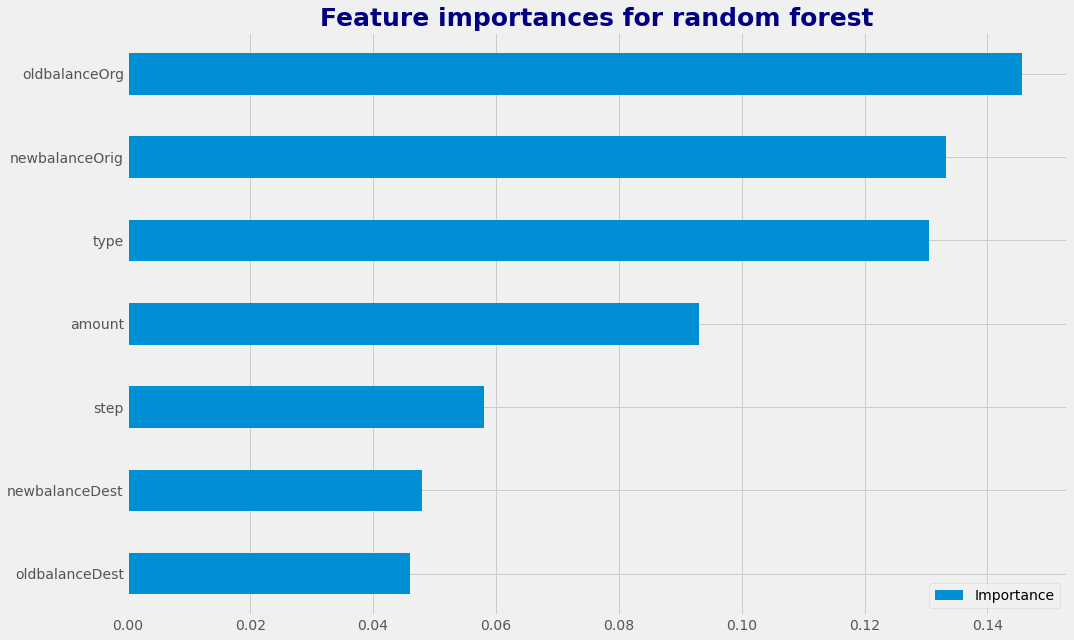

In [50]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = x_valid.columns, columns=["Importance"])

#plot top 7 feature importances, sorted
RF_importances[:7].sort_values(by="Importance").plot.barh()

plt.title("Feature importances for random forest", fontsize= 25, fontweight= "bold", color= ("Navy"))
plt.show()

In [51]:
#get these top 7 importances
RF_importances[:7].sort_values(by='Importance').index.values

array(['oldbalanceDest', 'newbalanceDest', 'step', 'amount', 'type',
       'newbalanceOrig', 'oldbalanceOrg'], dtype=object)

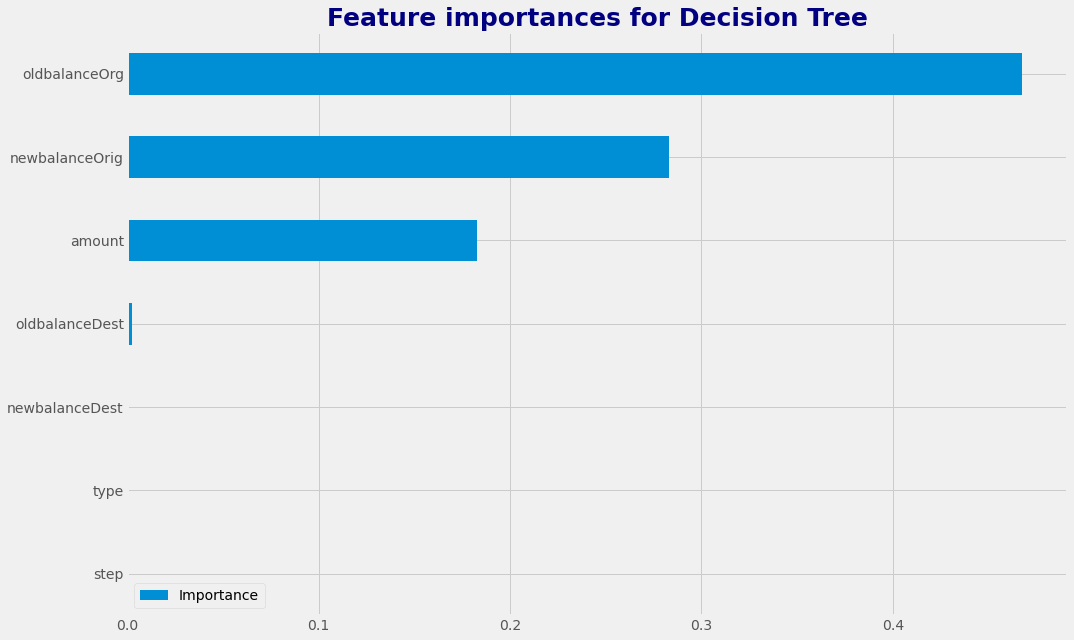

In [52]:
#get feature importances
DC_importances = pd.DataFrame(data = DC.feature_importances_,index = x_valid.columns, columns=["Importance"])

#plot top 10 feature importances, sorted
DC_importances[:7].sort_values(by="Importance").plot.barh()

plt.title("Feature importances for Decision Tree", fontsize= 25, fontweight= "bold", color= ("Navy"))
plt.show()

In [53]:
#get these top 7 importances
DC_importances[:7].sort_values(by='Importance').index.values

array(['step', 'type', 'newbalanceDest', 'oldbalanceDest', 'amount',
       'newbalanceOrig', 'oldbalanceOrg'], dtype=object)

## Feature Selection

In [54]:
#create a new x train with only 7 features
x_train2 = x_train[["newbalanceDest", "oldbalanceDest", "step", "newbalanceOrig",
       "type", "amount", "oldbalanceOrg"]]
x_train2.head(2)

,newbalanceDest,oldbalanceDest,step,newbalanceOrig,type,amount,oldbalanceOrg
726762,67730.65,35594.10,4,0.0,0,32136.55,0.0
535479,96398.77,34391.16,3,0.0,0,62007.61,30598.0


In [55]:
#create a new x valid with only 10 features
x_valid2 = x_valid[["newbalanceDest", "oldbalanceDest", "step", "newbalanceOrig",
       "type", "amount", "oldbalanceOrg"]]
x_valid2.head(2)

,newbalanceDest,oldbalanceDest,step,newbalanceOrig,type,amount,oldbalanceOrg
910892,0.0,0.0,5,0.0,1,7850.65,0.00
1030715,0.0,0.0,5,0.0,3,6972164.97,6972164.97


In [56]:
print(x_valid2.shape)

print(x_train2.shape)

(686, 7)
(1598, 7)


In [57]:
#create function to train2 a model and evaluate accuracy
def train2er(model,x_train2,y_train,x_valid2,y_valid):
    #fit your model
    model.fit(x_train2,y_train)
    #predict on the fitted model
    prediction = model.predict(x_valid2)
    #print evaluation metric
    print(f"""
    For {model.__class__.__name__}, Accuracy score is {(accuracy_score(prediction,y_valid)):.2%}
    """)
    print(classification_report(prediction,y_valid))   

In [58]:
#loop through each model, training in the process
for model in models:
    train2er(model,x_train2,y_train,x_valid2,y_valid)


    For LogisticRegression, Accuracy score is 93.00%
    
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       297
           1       0.98      0.90      0.94       389

    accuracy                           0.93       686
   macro avg       0.93      0.94      0.93       686
weighted avg       0.93      0.93      0.93       686


    For KNeighborsClassifier, Accuracy score is 92.13%
    
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       325
           1       0.93      0.92      0.92       361

    accuracy                           0.92       686
   macro avg       0.92      0.92      0.92       686
weighted avg       0.92      0.92      0.92       686


    For DecisionTreeClassifier, Accuracy score is 98.54%
    
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       325
           1       0.99      0.98      0.99       361


## Evaluating with Cross Validation

In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

This gives us an idea of how the model will perform when it sees new data in the real world that it hasn't seen before.


In [59]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [60]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,x,y):
    """Cross validation function. Expects a model,"""
    # evaluate model
    scores = cross_val_score(model, x, y, scoring="accuracy", cv=cv, n_jobs=-1)
    # report performance
    print(f"""
          For {model.__class__.__name__}, Accuracy Score is: {(mean(scores)):.2%}
          """)
   

In [61]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,x_train2,y_train)
    


          For LogisticRegression, Accuracy Score is: 93.12%
          

          For KNeighborsClassifier, Accuracy Score is: 89.80%
          

          For DecisionTreeClassifier, Accuracy Score is: 97.12%
          

          For RandomForestClassifier, Accuracy Score is: 97.25%
          


# Confusion Matrix

Interpret the results using Confusion Matrix

In [62]:
#import python libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression - Confusion Matrix

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)


lr_cm = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
lr_cm.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Text(0.5, 1.0, 'Logistic Regression_Confusion Matrix')

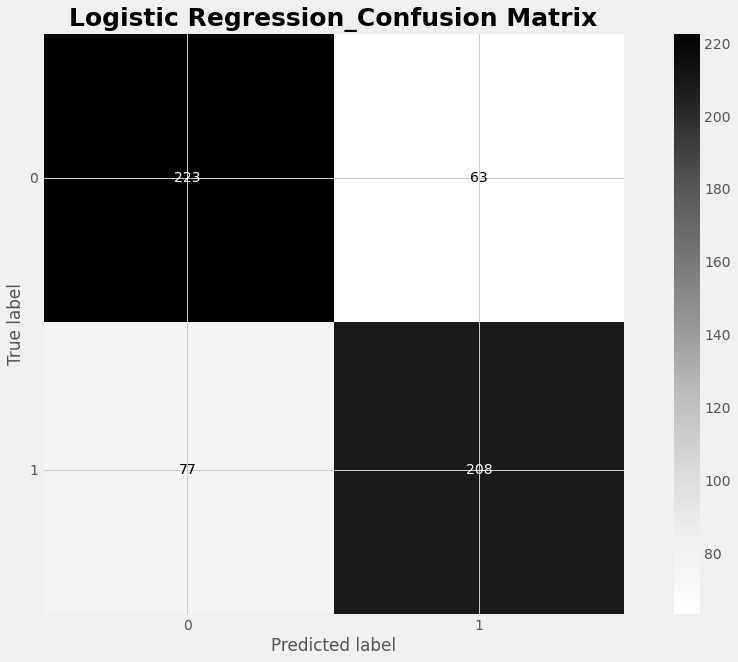

In [75]:
# Logistic Regression - Confusion Matrix
y_pred = lr_cm.predict(x_test)
lrcm = confusion_matrix(y_test, y_pred)

lrcm_display = ConfusionMatrixDisplay(lrcm).plot(cmap="Greys")
plt.title("Logistic Regression_Confusion Matrix", fontsize= 25, fontweight= "bold") #specification for Plot Title

In [65]:
print(lrcm)

[[223  63]
 [ 77 208]]


# K-Neighbors - Confusion Matrix

In [66]:
KN_CM = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
KN_CM.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Text(0.5, 1.0, 'KNeighbors_Confusion Matrix')

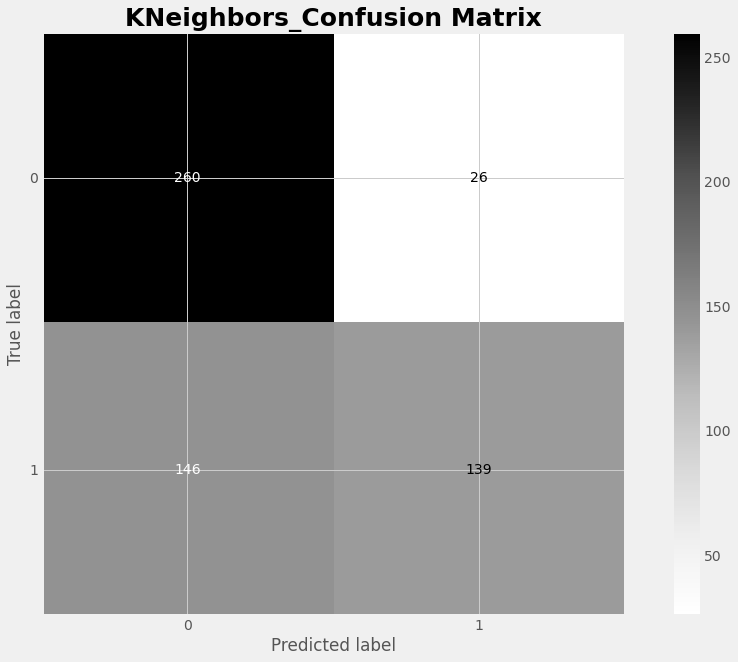

In [67]:

y_pred = KN_CM.predict(x_test)
KCM = confusion_matrix(y_test, y_pred)

kcm_display = ConfusionMatrixDisplay(KCM).plot(cmap="Greys")
plt.title("KNeighbors_Confusion Matrix", fontsize= 25, fontweight= "bold", color= ("Black")) #specification for Plot Title

In [68]:
print(KCM)

[[260  26]
 [146 139]]


# Decision Tree - Confusion Matrix

In [69]:
DT_CM = make_pipeline(StandardScaler(), DecisionTreeClassifier(splitter='best'))
DT_CM.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Text(0.5, 1.0, 'Decision Tree_Confusion Matrix')

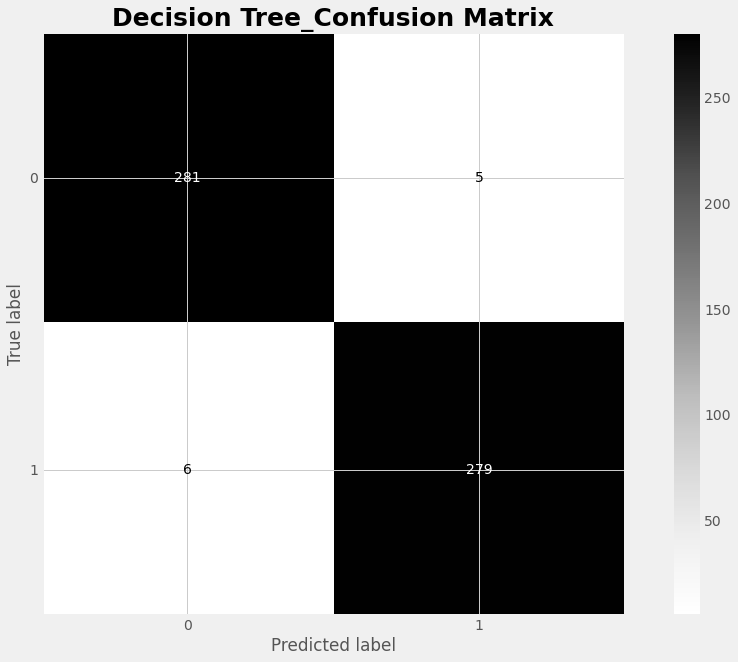

In [70]:
y_pred = DT_CM.predict(x_test)
DTCM = confusion_matrix(y_test, y_pred)

dtcm_display = ConfusionMatrixDisplay(DTCM).plot(cmap="Greys")
plt.title("Decision Tree_Confusion Matrix", fontsize= 25, fontweight= "bold") #specification for Plot Title

In [71]:
print(DTCM)

[[281   5]
 [  6 279]]


# Random Forest - Confusion Matrix¶

In [72]:
RF_CM = make_pipeline(StandardScaler(), RandomForestClassifier(max_features='auto'))
RF_CM.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

Text(0.5, 1.0, 'Random Forest_Confusion Matrix')

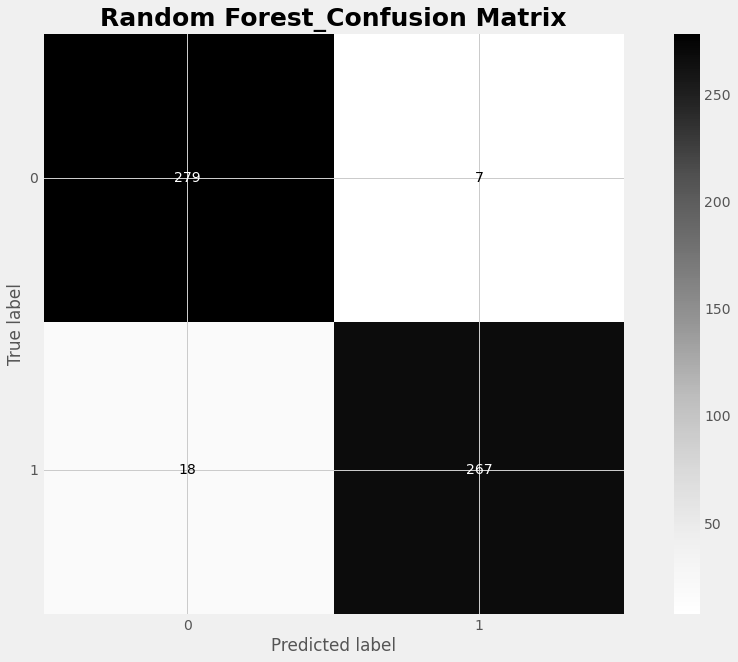

In [76]:

y_pred = RF_CM.predict(x_test)
RFCM = confusion_matrix(y_test, y_pred)

rfcm_display = ConfusionMatrixDisplay(RFCM).plot(cmap="Greys")
plt.title("Random Forest_Confusion Matrix", fontsize= 25, fontweight= "bold", color= ("Black")) #specification for Plot Title

In [74]:
print(RFCM)

[[279   7]
 [ 18 267]]


## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

The Population Sample used has equal data size on both the "0" and "1", 
("0" beign negative fraudlent transactions and "1" beign positive fraudlent transaction)

**We used 4 ML Algorithms**

    a. Logistic Regression
    b. KNeighbors
    c. Decision Tree
    d. Random Forest
    
**Confusion Matrix Interpretation**
        
            1   0
        [1 [TP FP]
         0 [FN TN]]

**Confusion Matrix for Logistic Regression**

    With a Our test size at 30%
    Our result:
            [[223  63]
             [ 77 208]]

    Shows that our model predicts the "0" at 71.75% Correctly
    while it predicted the **"1" at 72.98%** correctly.
    Logistic Regression performed evenly with both fraudlent & 
    non-fraudlent transactions.


**Confusion Matrix for K-Neighbors**

    With a Our test size at 30%
    Our result:
            [[260  26]
             [146 139]]

    Shows that our model predicts the **"0" at 90.90%** Correctly
    while it predicted the "1" at 48.95% correctly.
    Kneighbors performed better with non-fraudlent transactions.

**Confusion Matrix for Decision Tree**

    With a Our test size at 30%
    Our result:
            [[281   5]
             [  6 279]]

    Shows that our model predicts the **"0" at 98.25%** Correctly
    while it predicted the "1" at 97.89% correctly.
    Decision Tree performed evenly with both fraudlent & 
    non-fraudlent transactions.
    
**Confusion Matrix for Random Forest**

    With a Our test size at 30%
    Our result:
            [[279   7]
             [ 18 267]]

    Shows that our model predicts the "0" at 97.55% Correctly
    while it predicted the "1" at 93.68% correctly.
    Random Forrest performed minutely better with non-fraudlent
    transactions.
    


## Inference of Result

**Decision Tree** performed best in predicting if Transaction **was fraudlent or not** (isFraud).

## Summary

What model should be deployed to production?
Any other comments?

    1. Decision Tree Model Algorithm to be deployed. As it performed best. 
    2. Training the Model with a lopsided dataset may result in porer result.